# تحميل (استيراد) المكتبات الأساسية
# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

# تحميل بيانات مخطط الفراشة
# Load Butterfly Diagram Data

In [2]:
# Helper function to extract floats
def extract_floats(line):
    line = line.replace(",", ".")
    return [float(f) for f in re.findall(r'-?\d+\.\d+|-?\d+', line)]

#  Butterfly Diagram Data
rotations, area_data = [], []
with open('bflydata_2.csv', 'r') as f:
    lines = f.readlines()

i = 0
while i < len(lines):
    if lines[i].strip().isdigit():
        rotation = int(lines[i].strip())
        bin_values = []
        for j in range(1, 6):
            bin_values += extract_floats(lines[i + j])
        if len(bin_values) == 50:
            rotations.append(rotation)
            area_data.append(bin_values)
        i += 6
    else:
        i += 1

area_array = np.array(area_data)
area_array_nan = np.where(area_array == 0, np.nan, area_array)

# Latitude bins
sin_lats = np.linspace(1, -1, 50)
latitudes = np.arcsin(sin_lats) * 180 / np.pi

# Carrington rotation dates
rotation_dates = [datetime(1853, 11, 9) + timedelta(days=27.2753 * (r - 1)) for r in rotations]

# Filter range
start_filter = datetime(1870, 1, 1)
end_filter = datetime(2020, 12, 31)
mask = [(d >= start_filter and d <= end_filter) for d in rotation_dates]
filtered_dates = [d for d, m in zip(rotation_dates, mask) if m]
filtered_area = area_array_nan[mask]

# تحميل بيانات البقع الشمسية
# Load Sunspot Number Data

In [3]:
#  Sunspot Number Data
sunspot_df = pd.read_csv(
    'SN_m_tot_V2.0.txt',
    delim_whitespace=True,
    header=None,
    comment='%',
    names=["Year", "Month", "Date_Fraction", "Sunspot_Number", "Std_Dev", "Num_Obs", "Definitive"],
    on_bad_lines='skip'
)
sunspot_df["Date"] = pd.to_datetime(dict(year=sunspot_df["Year"], month=sunspot_df["Month"], day=1))
full_end_date = sunspot_df["Date"].max()
sunspot_df["Smoothed"] = sunspot_df["Sunspot_Number"].rolling(window=12, center=True).mean()

# Solar cycle labeling
cycle_years = [1878, 1890, 1902, 1913, 1923, 1933, 1944, 1954, 1964, 1976, 1986, 1996, 2008]
cycle_numbers = list(range(12, 25))
if full_end_date.year >= 2019:
    cycle_years.append(2020)
    cycle_numbers.append(25)

/var/folders/jh/6nq_ym693fn165j5sx8tmqy00000gn/T/ipykernel_83747/2861761001.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sunspot_df = pd.read_csv(


# العرض Visualization

/var/folders/jh/6nq_ym693fn165j5sx8tmqy00000gn/T/ipykernel_83747/392796738.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


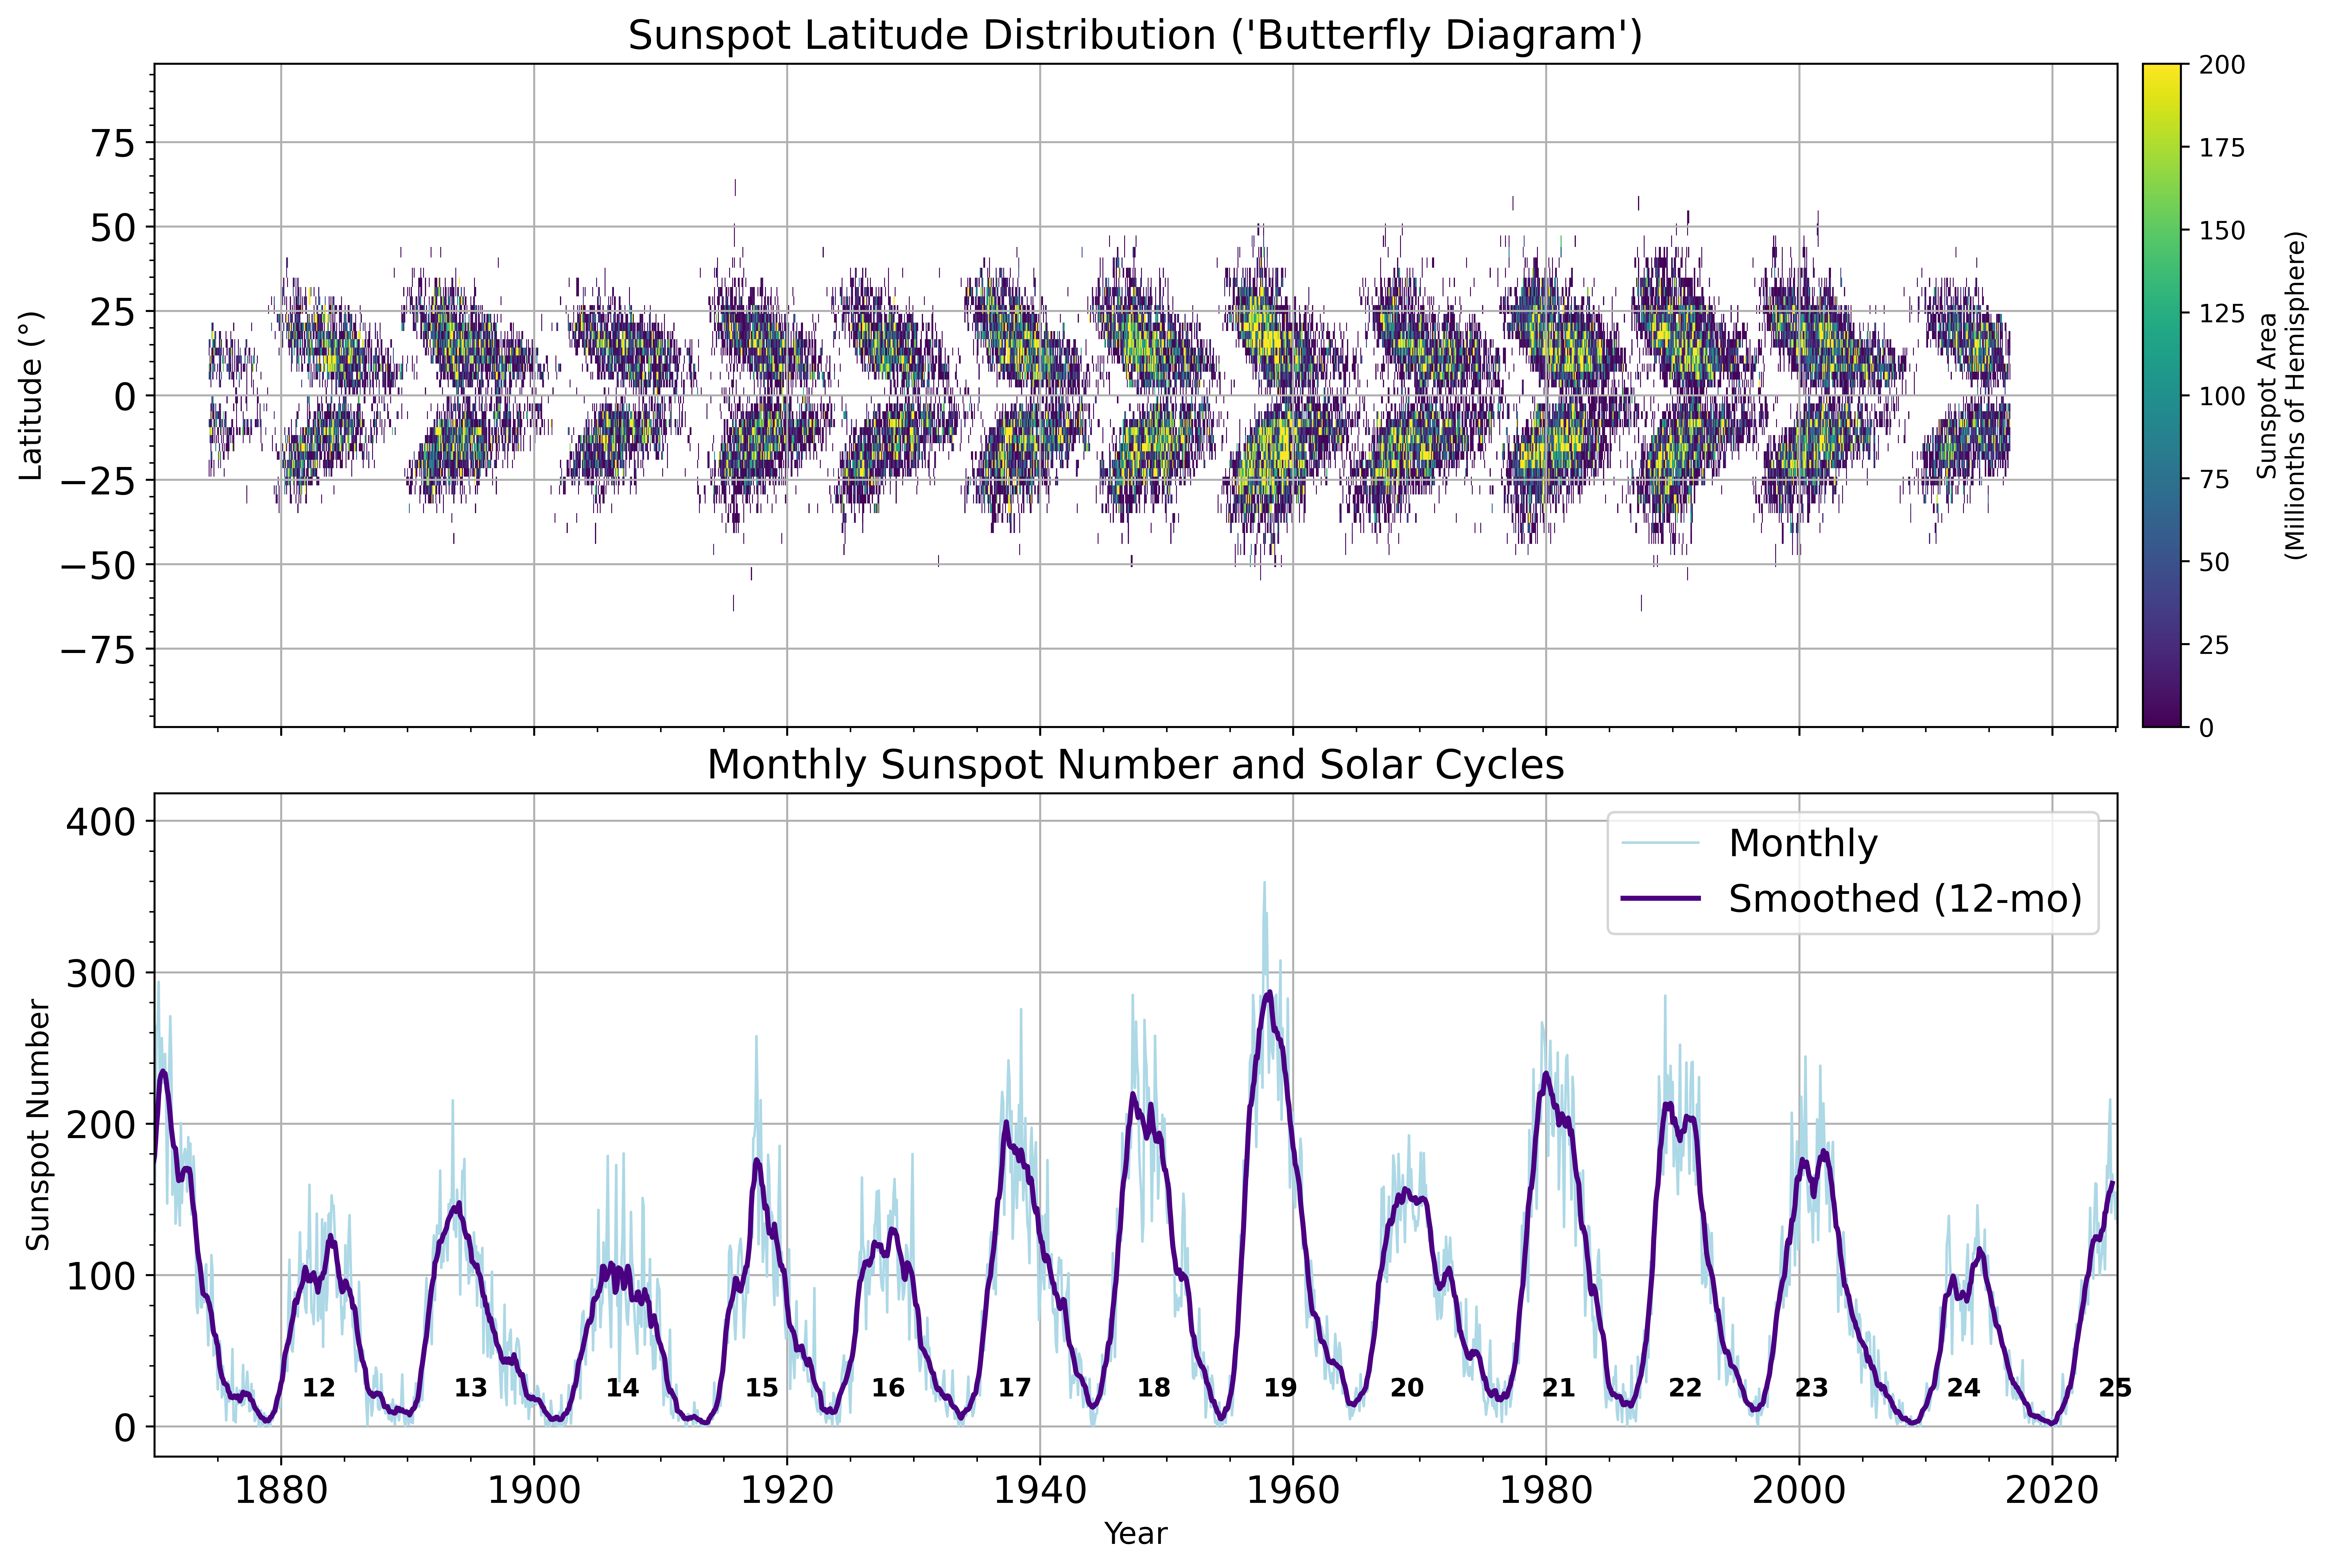

In [10]:
# Plotting
fig, axs = plt.subplots(nrows=2, figsize=(14, 10), sharex=True, gridspec_kw={'hspace': 0.1}, dpi=600)

# Butterfly Diagram
mesh = axs[0].pcolormesh(
    filtered_dates, latitudes, filtered_area.T, shading='auto',
    cmap='viridis', vmin=0, vmax=200
)
axs[0].set_title("Sunspot Latitude Distribution ('Butterfly Diagram')", fontsize=16)
axs[0].set_ylabel("Latitude (°)", fontsize=12)
axs[0].set_xlim(start_filter, full_end_date)
axs[0].tick_params(labelsize=12)
axs[0].tick_params(labelsize=15)
axs[0].minorticks_on()
axs[0].grid(True)
for spine in axs[0].spines.values():
    spine.set_visible(True)

# Sunspot Number Plot
axs[1].plot(sunspot_df["Date"], sunspot_df["Sunspot_Number"], color="lightblue", linewidth=1, label="Monthly")
axs[1].plot(sunspot_df["Date"], sunspot_df["Smoothed"], color="indigo", linewidth=2, label="Smoothed (12-mo)")
for year, number in zip(cycle_years, cycle_numbers):
    axs[1].text(pd.Timestamp(f"{year+5}-01-01"), 20, f"{number}",
                ha='center', fontsize=10, color="black", fontweight="bold")
axs[1].set_title("Monthly Sunspot Number and Solar Cycles", fontsize=16)
axs[1].set_xlabel("Year", fontsize=12)
axs[1].set_ylabel("Sunspot Number", fontsize=12)
axs[1].tick_params(labelsize=12)
axs[1].tick_params(labelsize=15)
axs[1].minorticks_on()
axs[1].grid(True)
axs[1].legend(fontsize=15)
for spine in axs[1].spines.values():
    spine.set_visible(True)

# Colorbar
pos = axs[0].get_position()
cbar_ax = fig.add_axes([0.91, pos.y0, 0.015, pos.height])
fig.colorbar(mesh, cax=cbar_ax, label="Sunspot Area\n(Millionths of Hemisphere)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


/var/folders/jh/6nq_ym693fn165j5sx8tmqy00000gn/T/ipykernel_83747/3714995365.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


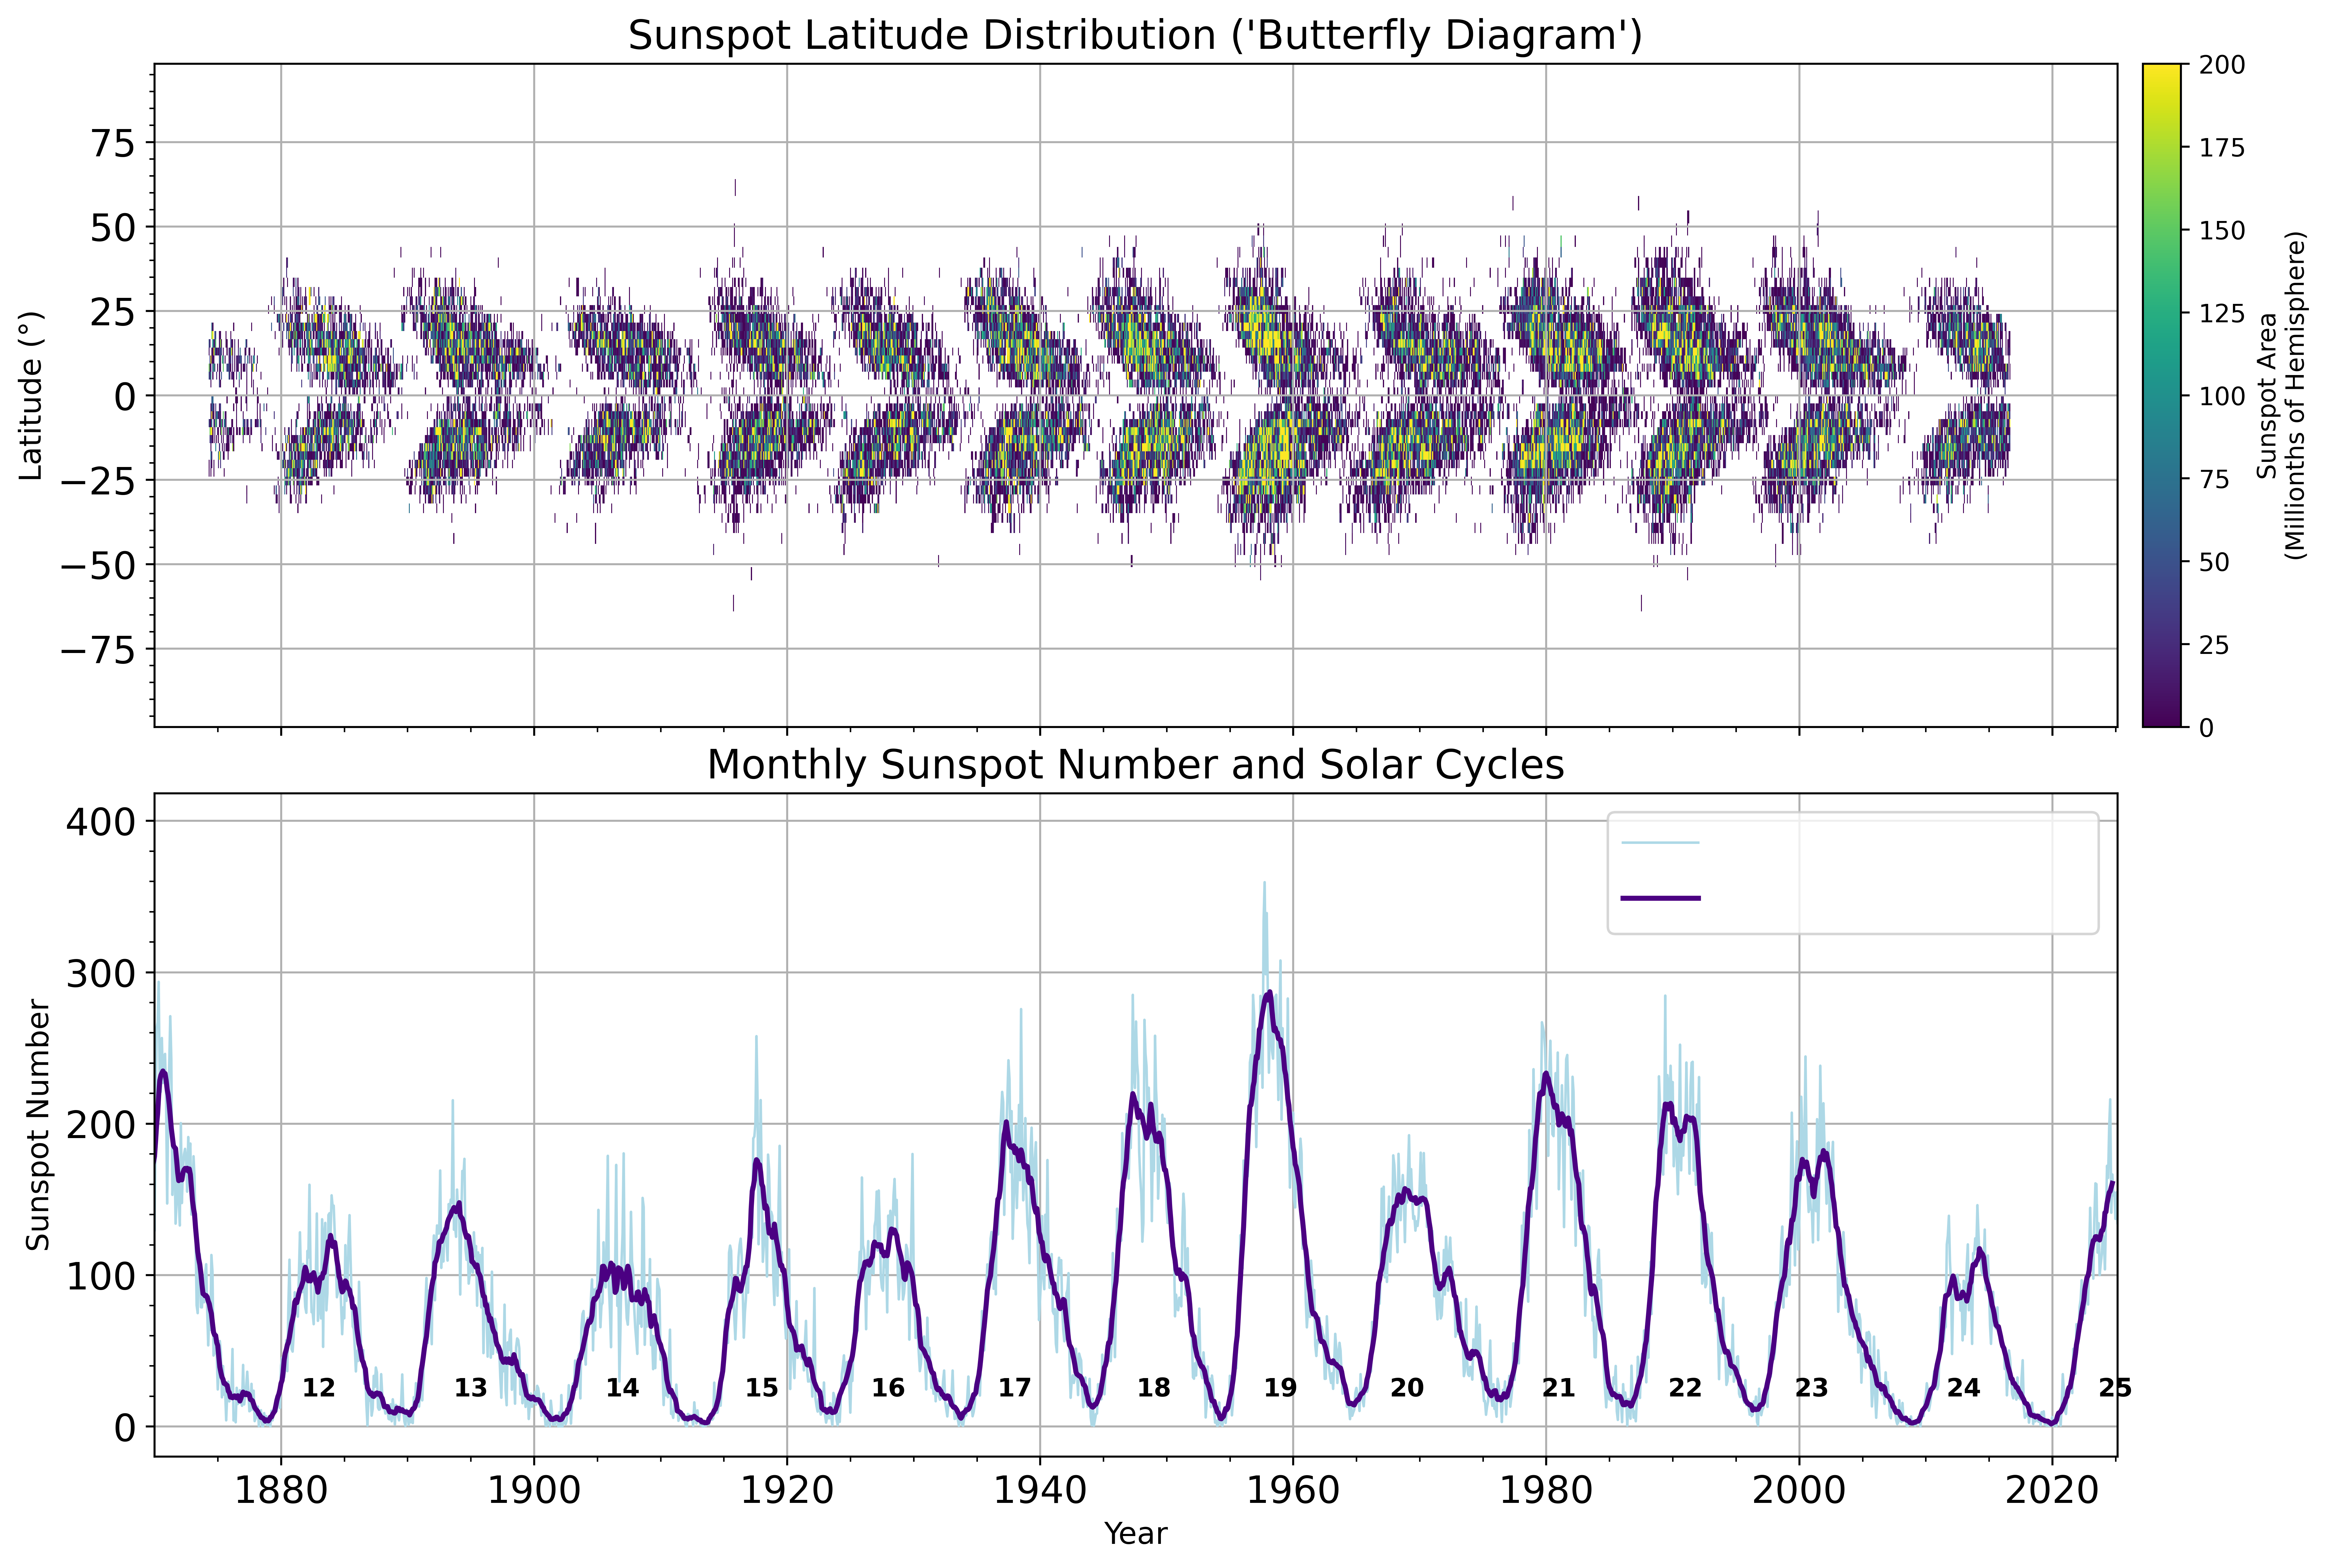

In [11]:
# Plotting
fig, axs = plt.subplots(nrows=2, figsize=(14, 10), sharex=True, gridspec_kw={'hspace': 0.1}, dpi=600)

# Butterfly Diagram
mesh = axs[0].pcolormesh(
    filtered_dates, latitudes, filtered_area.T, shading='auto',
    cmap='viridis', vmin=0, vmax=200
)
axs[0].set_title("Sunspot Latitude Distribution ('Butterfly Diagram')", fontsize=16)
axs[0].set_ylabel("Latitude (°)", fontsize=12)
axs[0].set_xlim(start_filter, full_end_date)
axs[0].tick_params(labelsize=12)
axs[0].tick_params(labelsize=15)
axs[0].minorticks_on()
axs[0].grid(True)
for spine in axs[0].spines.values():
    spine.set_visible(True)

# Sunspot Number Plot
axs[1].plot(sunspot_df["Date"], sunspot_df["Sunspot_Number"], color="lightblue", linewidth=1, label="Monthly")
axs[1].plot(sunspot_df["Date"], sunspot_df["Smoothed"], color="indigo", linewidth=2, label="Smoothed (12-mo)")
for year, number in zip(cycle_years, cycle_numbers):
    axs[1].text(pd.Timestamp(f"{year+5}-01-01"), 20, f"{number}",
                ha='center', fontsize=10, color="black", fontweight="bold")
axs[1].set_title("Monthly Sunspot Number and Solar Cycles", fontsize=16)
axs[1].set_xlabel("Year", fontsize=12)
axs[1].set_ylabel("Sunspot Number", fontsize=12)
axs[1].tick_params(labelsize=12)
axs[1].tick_params(labelsize=15)
axs[1].minorticks_on()
axs[1].grid(True)
legend = axs[1].legend(fontsize=15)
for text in legend.get_texts():
    text.set_alpha(0.0)
    
for spine in axs[1].spines.values():
    spine.set_visible(True)

# Colorbar
pos = axs[0].get_position()
cbar_ax = fig.add_axes([0.91, pos.y0, 0.015, pos.height])
fig.colorbar(mesh, cax=cbar_ax, label="Sunspot Area\n(Millionths of Hemisphere)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
